In [1]:
# Import libs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import chi2


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

2024-03-09 13:40:08.606665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-09 13:40:09.165228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-09 13:40:09.170431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 13:40:11.132880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Grab data from .txt file

with open('data3.txt', 'r') as f:
    data = np.loadtxt(f)

df = pd.DataFrame(data)

df.head()

,0,1,2,3,4,5,6,7
0,7.0,6.0,7.0,4.0,5.0,4.0,7.0,7.0
1,8.0,6.0,7.0,6.0,7.0,6.0,8.0,7.0
2,10.0,10.0,9.0,9.0,10.0,9.0,10.0,9.0
3,8.0,7.0,7.0,7.0,8.0,7.0,9.0,8.0
4,8.0,7.0,7.0,7.0,9.0,8.0,9.0,8.0


In [3]:
# Get describe statistics

df.describe()

,0,1,2,3,4,5,6,7
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,7.830000,6.33000,7.020000,6.120000,7.410000,6.370000,8.220000,7.64000
std,1.279639,2.28767,1.476961,1.991294,1.875385,2.033333,1.219207,1.22697
min,5.000000,2.00000,4.000000,2.000000,4.000000,2.000000,6.000000,5.00000
25%,7.000000,5.00000,6.000000,4.000000,6.000000,4.000000,7.000000,7.00000
50%,8.000000,6.00000,7.000000,6.000000,8.000000,7.000000,8.000000,8.00000
75%,9.000000,8.00000,8.000000,8.000000,9.000000,8.000000,9.000000,8.25000
max,10.000000,10.00000,9.000000,9.000000,10.000000,9.000000,10.000000,10.00000


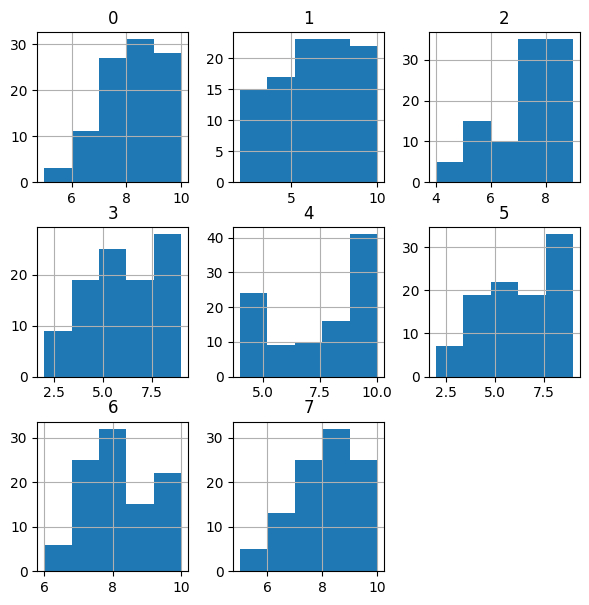

In [4]:
# Show histograms

df.hist(bins = 5, figsize = (7, 7))
plt.show()

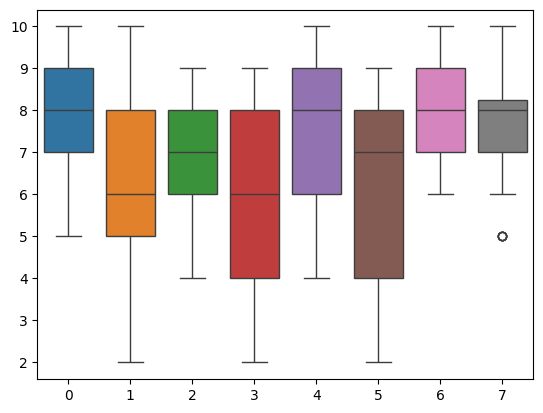

In [5]:
sns.boxplot(df)
plt.show()

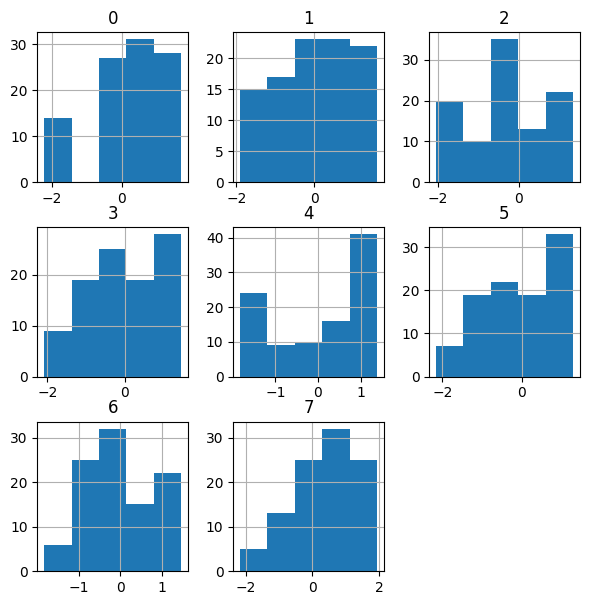

In [6]:
# Normalize data

## Custom standartization

# def custom_standard_scaler(data):
#     mean = data.mean(axis = 0)
#     std_dev = data.std(axis = 0)
#     standardized_data = (data - mean) / std_dev
#     return standardized_data


# df_standardized = custom_standard_scaler(df)

# df_standardized.hist(bins = 5, figsize = (7, 7))
# plt.show()

# sns.boxplot(df)
# plt.show()

scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)

df.hist(bins = 5, figsize = (7, 7))
plt.show()

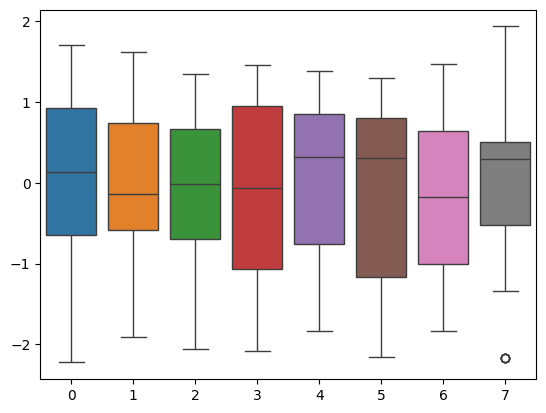

In [7]:
# And show boxplots after normalization

sns.boxplot(df)
plt.show()

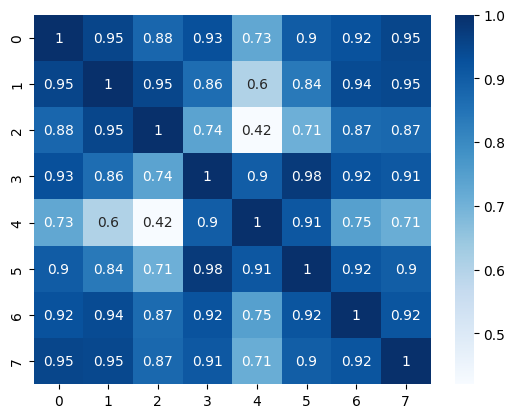

In [8]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

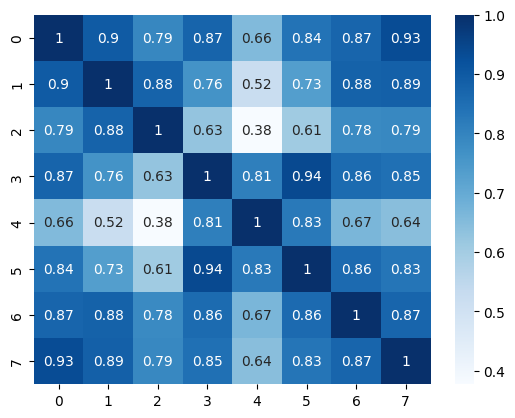

In [9]:
sns.heatmap(df.corr(method = 'kendall'), cmap = 'Blues', annot = True)
plt.show()

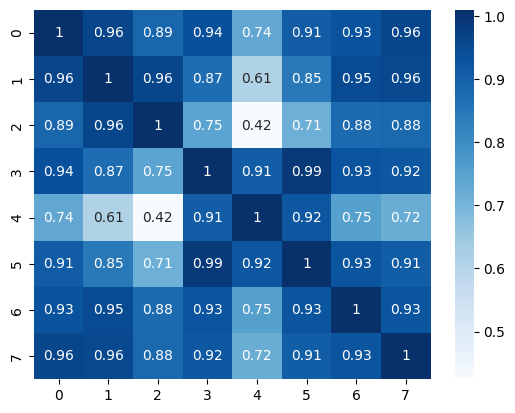

In [10]:
# Show covarvation matrix
# As soon as data is normalized we get simular results as correlation matrix 

sns.heatmap(df.cov(), cmap = 'Blues', annot = True)
plt.show()

In [11]:
# Ivestigate if it's nessesary to use PCA 

cov = df.cov()

d = 0
for i in range(df.shape[1]):
    for j in range(i, df.shape[1]):
        d += cov.iloc[i, j] ** 2

d *= df.shape[0]

chi_square = chi2.ppf(0.95, df.shape[1] * (df.shape[1] - 1) / 2)

print(f"chi_square : {chi_square}, d : {d}")

chi_square : 41.33713815142739, d : 2928.540899077602


In [12]:
# So d >> chi_square, we can use PCA

# Get eigenvalue and eigenvector
Lambda, A = np.linalg.eig(cov)

Z = np.dot(df, A)

# The sum of the variance of the main components
sum_Z = np.sum(np.diag(Lambda))

# The sum of the variance of the original data
sum_X = np.sum(np.var(df, axis = 0) ** 2)

print(f"PCA: {sum_Z}, primal data: {sum_X}")

PCA: 8.080808080808085, primal data: 8.000000000000004


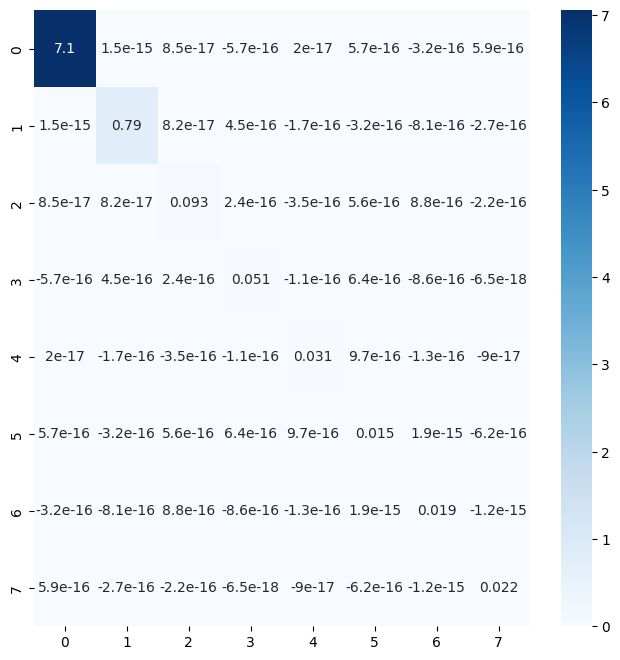

In [13]:
# Show PCA covarvation matrix

Z = pd.DataFrame(Z)

plt.figure(figsize = (8, 8))
sns.heatmap(Z.cov(), cmap = 'Blues', annot = True)
plt.show()

# Show that the principal components have become orthogonal

In [14]:
# Determine the relative proportion of the spread attributable to the main components

alpha = list(Lambda[i] for i in range(df.shape[1]))

lambda_sum = np.sum(Lambda)

alpha /= lambda_sum

print(alpha)

[0.87297427 0.09832963 0.01150659 0.00636905 0.00386842 0.00189928
 0.00233608 0.00271669]


In [15]:
# The relative share of the spread attributable to the first i components

gamma = list(np.sum(Lambda[: i + 1]) for i in range(df.shape[1]))
gamma /= lambda_sum

print(gamma)

[0.87297427 0.9713039  0.98281049 0.98917953 0.99304796 0.99494724
 0.99728331 1.        ]


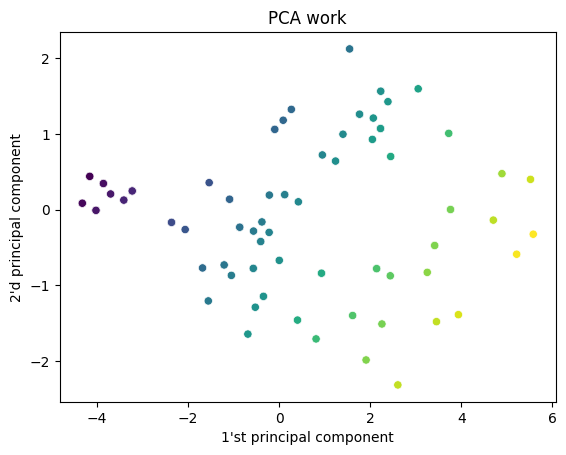

In [16]:
sns.scatterplot(x = Z.iloc[:, 0], y = Z.iloc[:, 1], c = Z.iloc[:, 0] - Z.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("PCA work")   
plt.show()

<Axes: >

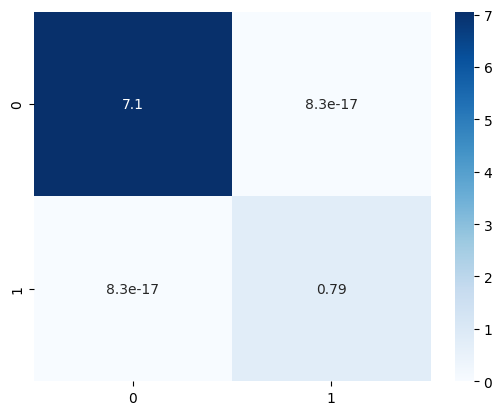

In [17]:
# Try hardcode sklearn PCA

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(df_pca)

sns.heatmap(df_pca.cov(), annot = True, cmap = 'Blues')

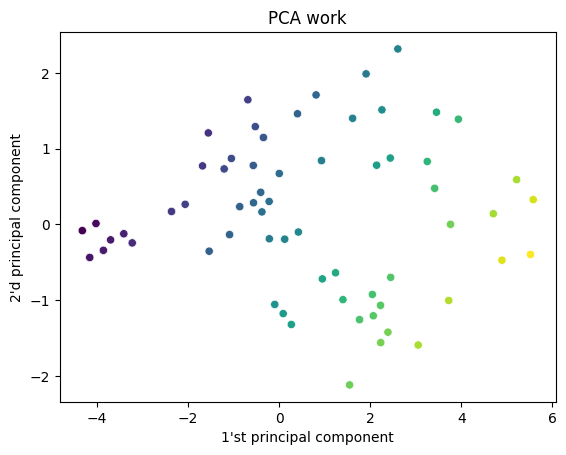

In [18]:
sns.scatterplot(x = df_pca.iloc[:, 0], y = df_pca.iloc[:, 1], c = df_pca.iloc[:, 0] - df_pca.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("PCA work")
plt.show()

<Axes: >

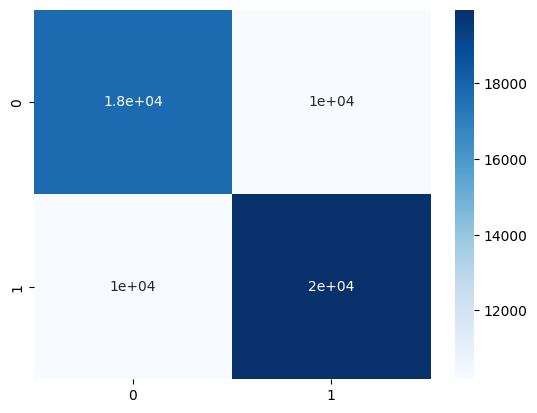

In [19]:
# Try t-sne for space reduce 

tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(df_tsne)

sns.heatmap(df_tsne.cov(), annot = True, cmap = 'Blues')

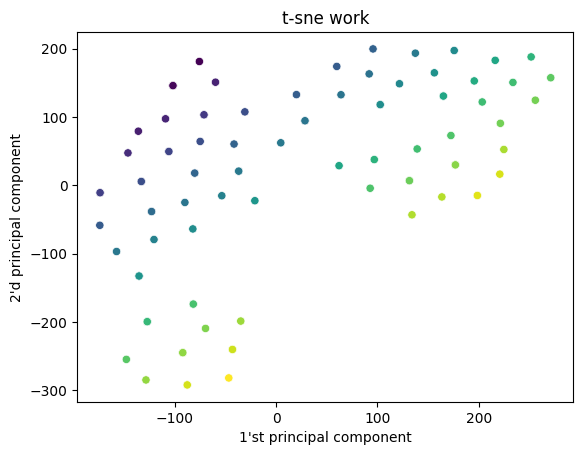

In [20]:
# And plot it 

sns.scatterplot(x = df_tsne.iloc[:, 0], y = df_tsne.iloc[:, 1], c = df_tsne.iloc[:, 0] - df_tsne.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("t-sne work")
plt.show()

<Axes: >

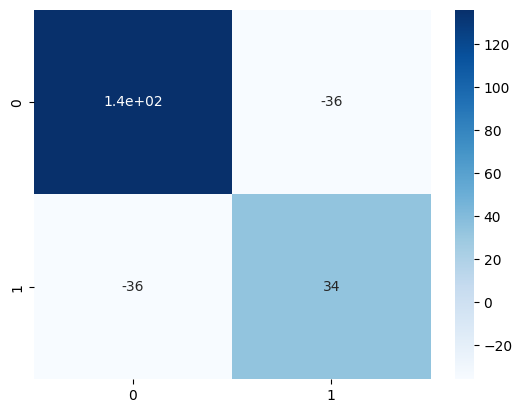

In [21]:
# And use the umap on the same dataset

umap = UMAP(n_components = 2)
df_umap = umap.fit_transform(df)
df_umap = pd.DataFrame(df_umap)

sns.heatmap(df_umap.cov(), annot = True, cmap = 'Blues')

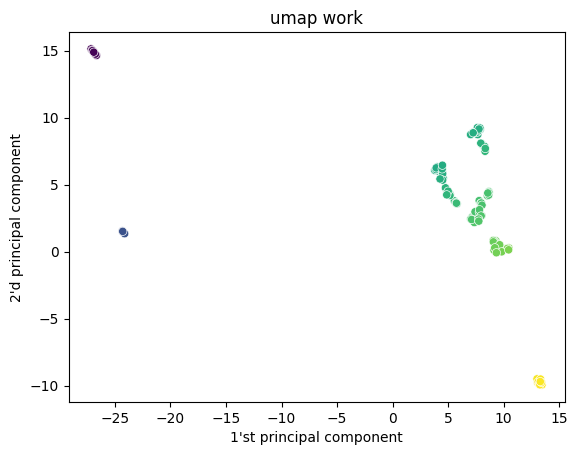

In [22]:
sns.scatterplot(x = df_umap.iloc[:, 0], y = df_umap.iloc[:, 1], c = df_umap.iloc[:, 0] - df_umap.iloc[:, 1])
plt.xlabel("1'st principal component")
plt.ylabel("2'd principal component")
plt.title("umap work")
plt.show()